<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# MY NOTE: the two csv files are equal. So, the next commented read_csv command seems obsolete.
# =============================================================================================
# If you were unable to complete the previous lab correctly you can uncomment and load this csv
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(8)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


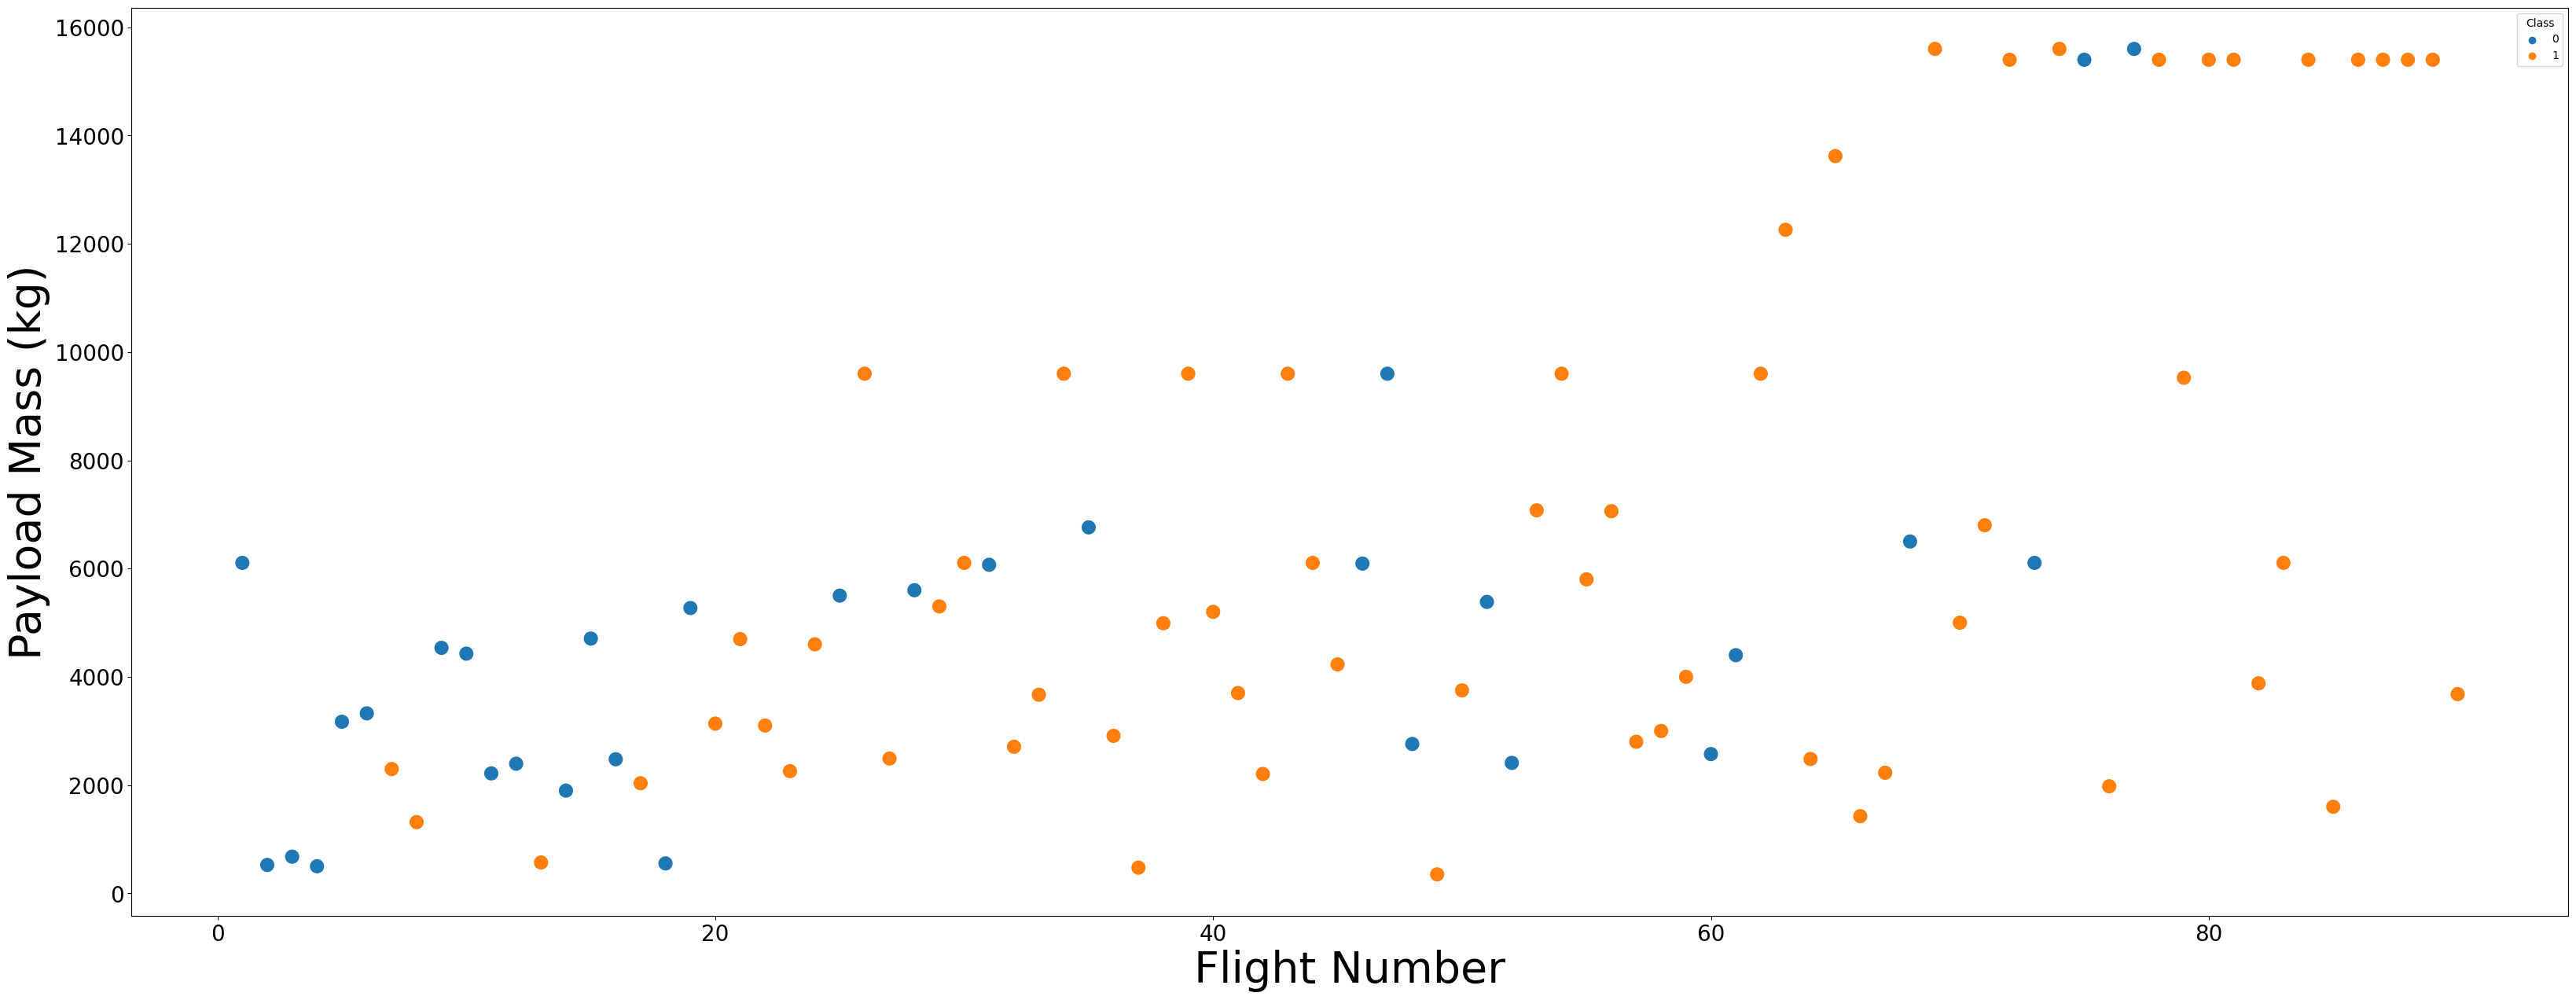

In [3]:
fig, ax = plt.subplots(figsize=(40, 15))
#sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
sns.scatterplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, s = 200)
plt.xlabel("Flight Number",fontsize=40)
plt.ylabel("Payload Mass (kg)",fontsize=40)
# changing the fontsize of x and y ticks
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


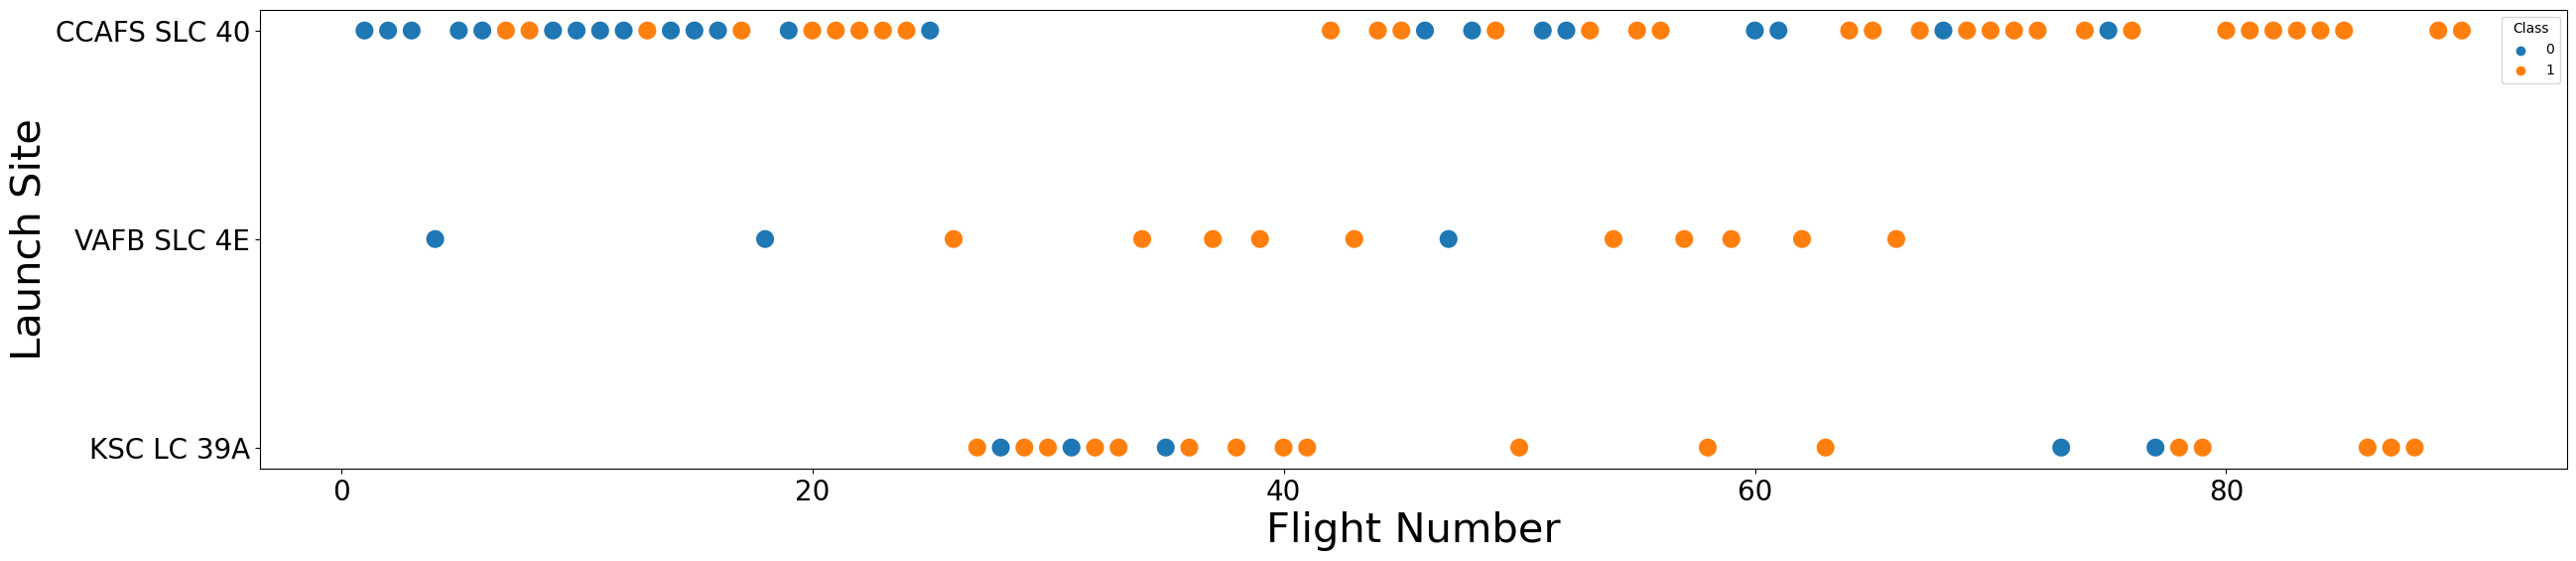

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
fig, ax = plt.subplots(figsize=(30, 6))
# sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
sns.scatterplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df,s=200)
plt.xlabel("Flight Number",fontsize=30)
plt.ylabel("Launch Site",fontsize=30)
# changing the fontsize of x and y ticks
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

<b>Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.<br>
<span style="color:red">*** MY ANSWER ???</span></b>

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


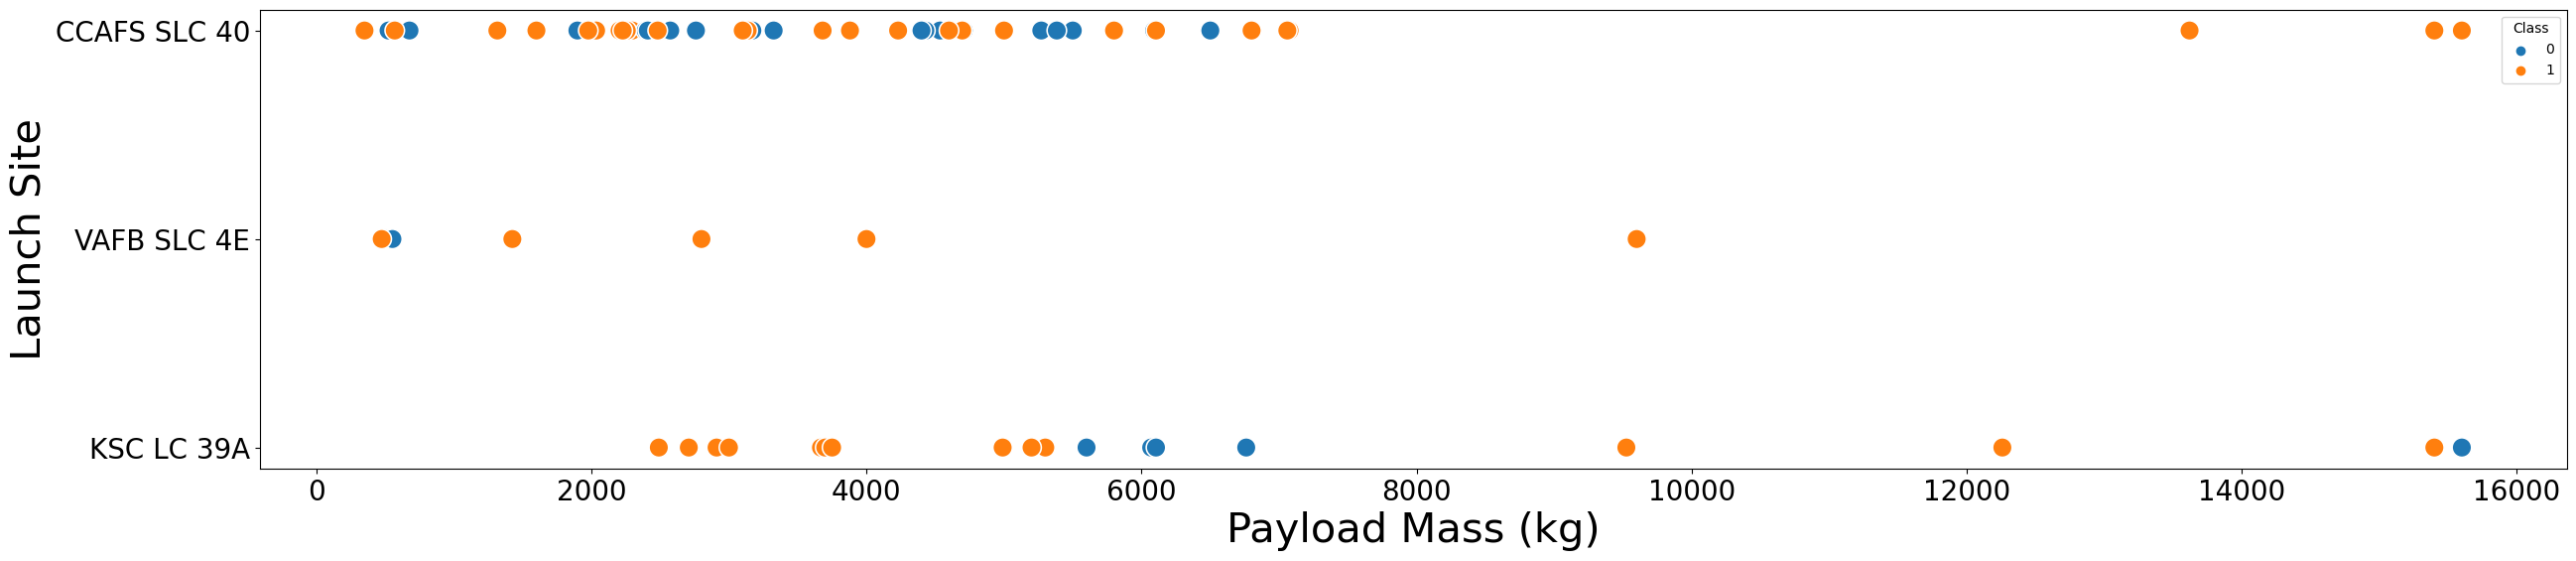

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, 
# and hue to be the class value
fig, ax = plt.subplots(figsize=(30, 6))
# sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
sns.scatterplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, s=200)
plt.xlabel("Payload Mass (kg)",fontsize=30)
plt.ylabel("Launch Site",fontsize=30)
# changing the fontsize of x and y ticks
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavy payload mass (greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [6]:
# HINT use groupby method on Orbit column and get the mean of Class column

# Generate pandas Series with the orbits (indexes) and success rates (values)
series_orbit=df.groupby(['Orbit'])['Class'].mean(numeric_only=True)
series_orbit.sort_index()
print(type(series_orbit),series_orbit)

<class 'pandas.core.series.Series'> Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64


In [7]:
# MY ADDITION: compute total of launches per orbit
num_launches_per_site = df['Orbit'].value_counts().sort_index()
print(num_launches_per_site,type(num_launches_per_site))
print('\naverage number of launches per site : {0:.2f}\nmedian number of launches per site .: {1:.0f}\n'.
      format(df['Orbit'].value_counts().mean(),df['Orbit'].value_counts().median()))
num_success_per_site = df.groupby(['Orbit'])['Class'].sum().sort_index()
print(num_success_per_site,type(num_success_per_site))

ES-L1     1
GEO       1
GTO      27
HEO       1
ISS      21
LEO       7
MEO       3
PO        9
SO        1
SSO       5
VLEO     14
Name: Orbit, dtype: int64 <class 'pandas.core.series.Series'>

average number of launches per site : 8.18
median number of launches per site .: 5

Orbit
ES-L1     1
GEO       1
GTO      14
HEO       1
ISS      13
LEO       5
MEO       2
PO        6
SO        0
SSO       5
VLEO     12
Name: Class, dtype: int64 <class 'pandas.core.series.Series'>


In [8]:
# For conference / learning  purposes only
print(series_orbit.index,series_orbit.values)

# create the numpy array with the success rates per orbit (needed to create barplot)
success_rates = np.array(series_orbit.values)
print(type(success_rates),success_rates)

Index(['ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO',
       'VLEO'],
      dtype='object', name='Orbit') [1.         1.         0.51851852 1.         0.61904762 0.71428571
 0.66666667 0.66666667 0.         1.         0.85714286]
<class 'numpy.ndarray'> [1.         1.         0.51851852 1.         0.61904762 0.71428571
 0.66666667 0.66666667 0.         1.         0.85714286]


In [9]:
# # plot the required chart
# sns.barplot(x = series_orbit.index, y = success_rates)
# plt.xlabel("Orbit",fontsize=20)
# plt.ylabel("Success Rate",fontsize=20)
# plt.show()

       orbit  success rate  total launches
ES-L1  ES-L1      1.000000               1
GEO      GEO      1.000000               1
GTO      GTO      0.518519              27
HEO      HEO      1.000000               1
ISS      ISS      0.619048              21
LEO      LEO      0.714286               7
MEO      MEO      0.666667               3
PO        PO      0.666667               9
SO        SO      0.000000               1
SSO      SSO      1.000000               5
VLEO    VLEO      0.857143              14


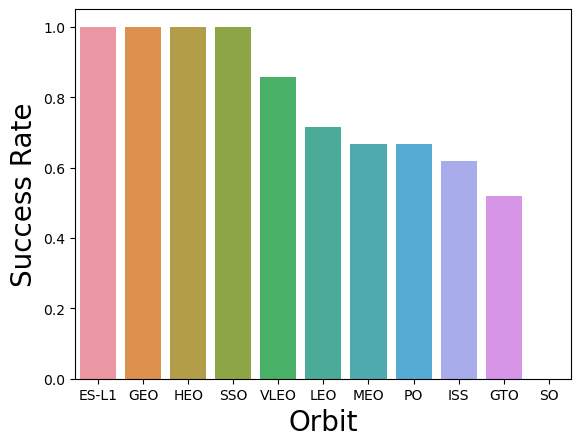

In [10]:
# MY ADDITION: barplot in descending order

# create the auxiliary dataframe
df_aux = pd.DataFrame({"orbit":series_orbit.index,"success rate":success_rates,"total launches":num_launches_per_site})
df_aux.sort_values(by=['orbit'],inplace=True)
print(df_aux.head(11))

# generate the barplot in descending order
sns.barplot(x='orbit', y="success rate", data=df_aux,
            order=df_aux.sort_values('success rate', ascending=False).orbit)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

total number of launches:  90 



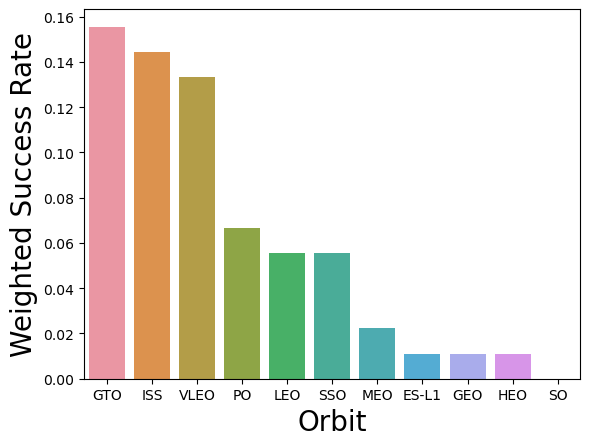

In [11]:
# MY ADDITION: weighted success rate (WSR) per site (WSR_i = SR_i * Num_launches_i / Total_Launches)
total_num_launches = df_aux["total launches"].sum()
print("total number of launches: ",total_num_launches,'\n')
df_aux["weighted success rate"] = df_aux["success rate"] * df_aux["total launches"] / total_num_launches

# SANITY CHECK: the sum of weighted success rates must be equal to the overall success rate (and it is indeed = 2/3)
#print(df_aux,'\n\n',df_aux['weighted success rate'].sum(),'\n',df['Class'].sum()/total_num_launches)

# plot the new barplot with the weighted success rate
sns.barplot(x='orbit', y="weighted success rate", data=df_aux,
            order=df_aux.sort_values('weighted success rate', ascending=False).orbit)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Weighted Success Rate",fontsize=20)
plt.show()

<b>Analyze the ploted bar chart try to find which orbits have higher sucess rate.<br><br>
<span style="color:red">*** MY ANSWER:<br> The success rate is 100% for ES-L1, GEO, HEO and SSO. However, the number of launches for the 3 first orbits are is just <u>ONE!</u>. This is an indication that <i>success rate</i> may not have enough statistical significance. To reinforce this fact, note that the median number of launches per orbit is also 5, with an average slightly higher than 8 (see cells above). Hence, among those orbits with 100% success rate, SSO is the only one whose number of launches is greater or equal the median.<br>
To cope with this, we define the `weighted success rate` (see formula in the previous cell) which takes into account the number of launches for each orbit. According to the definition, the sum of the weighted success rates (WSR) is the overall success rate of the dataset.<br>
Following this analysis, we can see that GTO, ISS and VLEO (that have 27, 21 and 14 launches respectively) have the highest weighted success rates and they are more than twice the value obtained for PO.<br>
The WSR does not seem an ideal measure too, since GTO and ISS have low success rates (51% and 62%, respectively).<br>
An alternative analysis is to consider only the `success rate' of the orbits whose number of launches is at least the median of this value, i.e., 5. In this case, the order of the orbits from best to worse success rate is: SSO, VLEO, LEO, PO, ISS and GTO. </span></b>

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


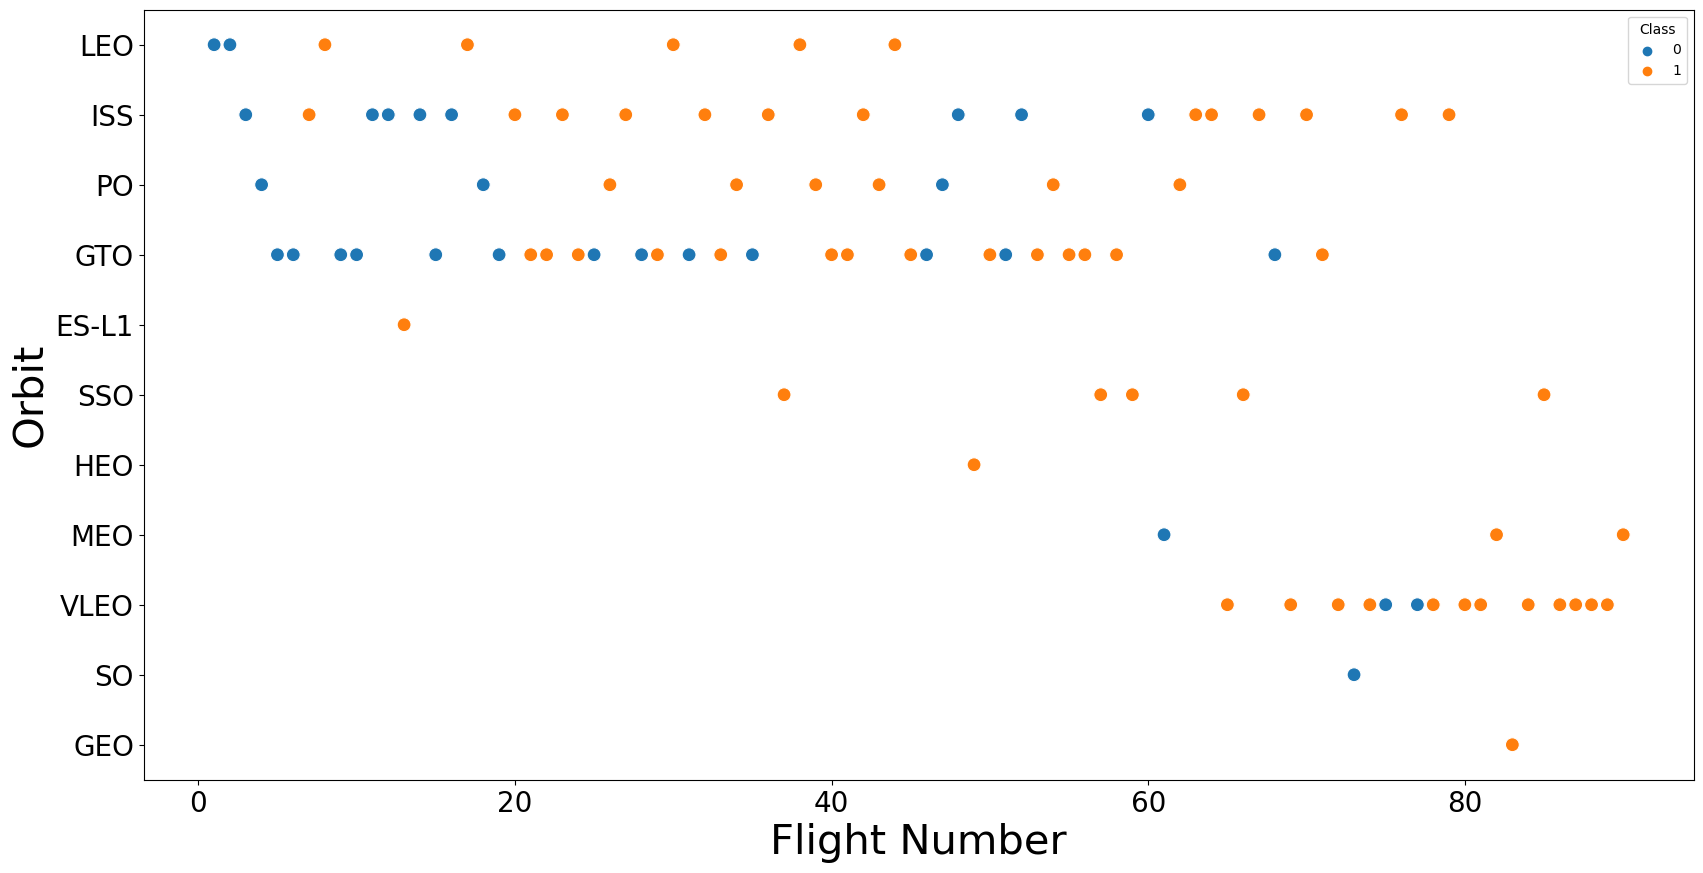

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="FlightNumber",
                y="Orbit",
                hue="Class",
                data=df, s=100)
plt.xlabel("Flight Number",fontsize=30)
plt.ylabel("Orbit",fontsize=30)
# changing the fontsize of x and y ticks
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


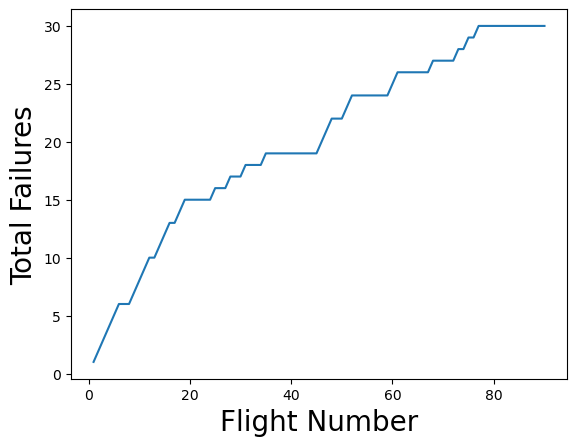

In [13]:
# MY ADDITION: analyzing cumulative number of failures as flight number increases.
# Flight numbers are given in increasing order of dates and it is reasonable to assume that the number of failures
# decreases over time. Let's check.
df_aux = pd.DataFrame()
df_aux['Flight Number'] = df['FlightNumber']
df_aux['Fail'] = 1 - df['Class']
df_aux['Cumulative Failures'] = df_aux['Fail'].cumsum()
#print(df_aux.head(20))
#print(df_aux.tail(20))

# plot line graph to analyze
sns.lineplot(x="Flight Number", y="Cumulative Failures", data = df_aux)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Total Failures",fontsize=20)
plt.show()

<span style="color:red"><b>*** MY ANSWER:</b><br>The previous graph confirm the intuition that there were more failures in early flights (the ones with smaller numbers) possibly due to the continuous technological improvements. For instance, in the first 30 flights the number of failures was 17, in the next 30 ones the failures dropped to 8 and, finally, in the last 30 flights only 5 failures occurred.<br>
Because the LEO, ISS, PO and GTO concentrated all but one of the 30 first flights, this decreased the success rates of these orbits. On the hand, for SSO, all flight numbers are larger than 30 and they all succeeded. This is an indication that the success rate of an orbit  is less dependent on the orbit itself and more related to technological problems that seem to have been solved during the development of the technology. </span>

### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


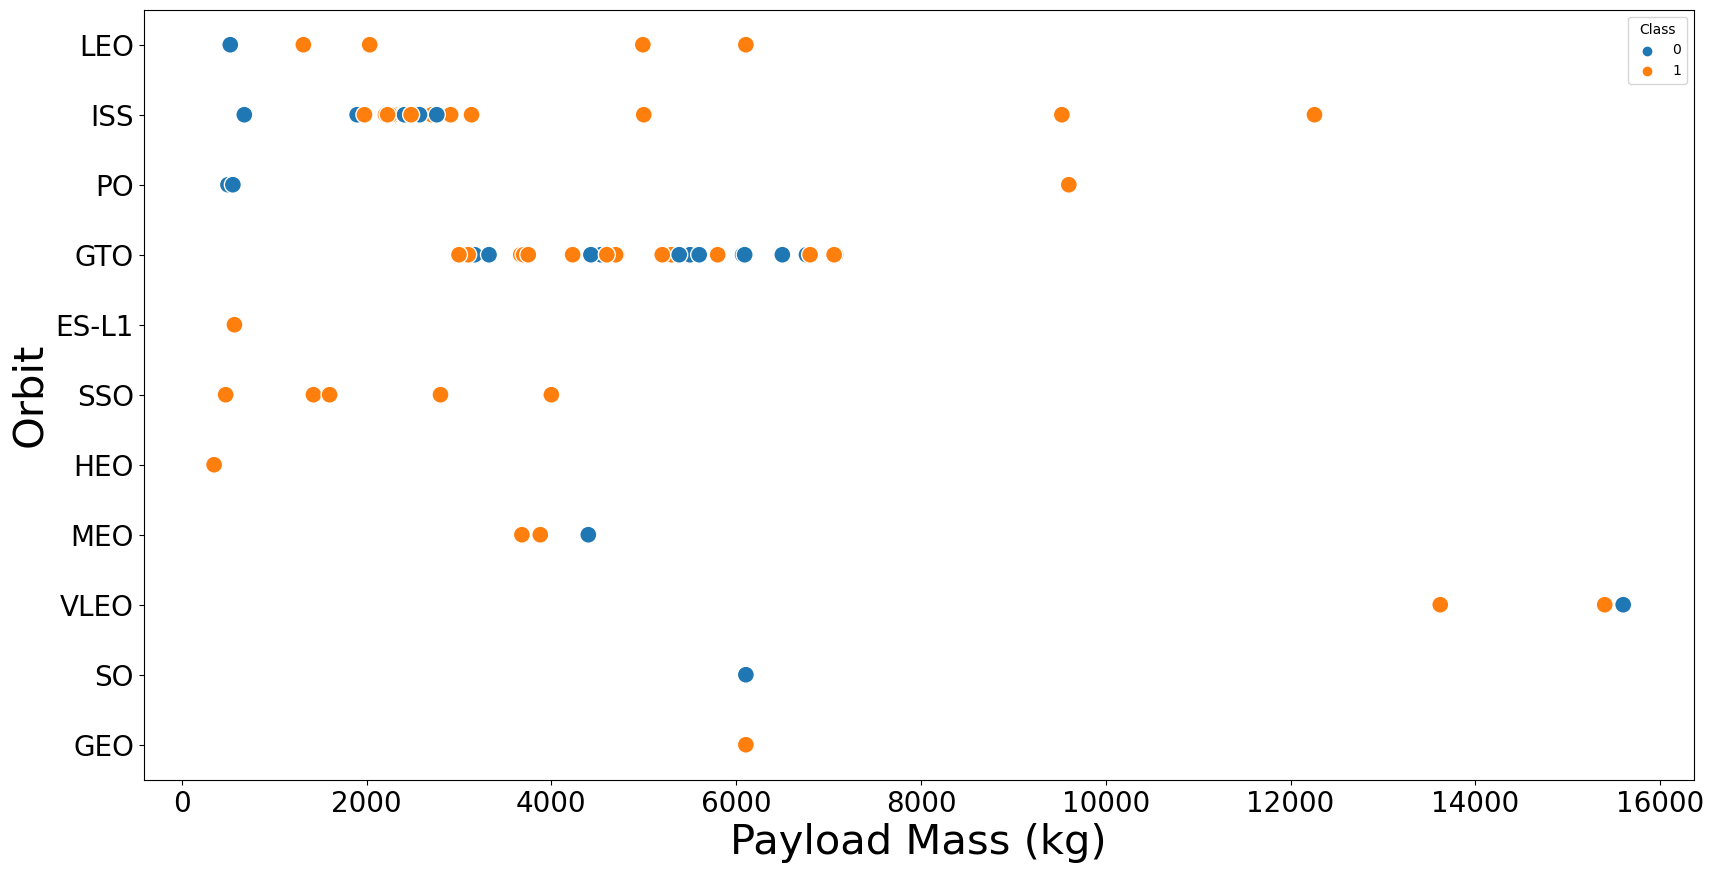

In [14]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="PayloadMass",
                y="Orbit",
                hue="Class",
                data=df, s=150)
plt.xlabel("Payload Mass (kg)",fontsize=30)
plt.ylabel("Orbit",fontsize=30)
# changing the fontsize of x and y ticks
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate <span style="color:red">~~are~~ <u>is</u> more <u>prominent</u></span> for Polar, LEO and ISS. <br>

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

<span style="color:red">(*) my changes. The text was a bit weird.</span>

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [15]:
# A function to Extract years from the date 
# def Extract_year(date):   # *** There was an error here. There is no need for a parameter date!
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# MY ADDITIONS:
Extract_year()
print(type(year),'\n',len(year),'\n',year)

<class 'list'> 
 90 
 ['2010', '2012', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020']


In [16]:
# MY ADDITION: Creates an auxiliary dataframe with the two set of values required to build the plot
df_aux = pd.DataFrame()
df_aux['Year'] = year
df_aux['Class'] = df['Class']
print(df_aux.shape)
df_aux.head()

(90, 2)


,Year,Class
0,2010,0
1,2012,0
2,2013,0
3,2013,0
4,2013,0


In [17]:
# MY ADDITION: grouping years and computing average launching success
series_aux = df_aux.groupby(['Year'])['Class'].mean(numeric_only=True)
print(type(series_aux),'\n',series_aux)

# create the numpy array with the success rates per year (needed to create the lineplot)
success_rates = np.array(series_aux.values)
success_rates

<class 'pandas.core.series.Series'> 
 Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64


array([0.        , 0.        , 0.        , 0.33333333, 0.33333333,
       0.625     , 0.83333333, 0.61111111, 0.9       , 0.84210526])

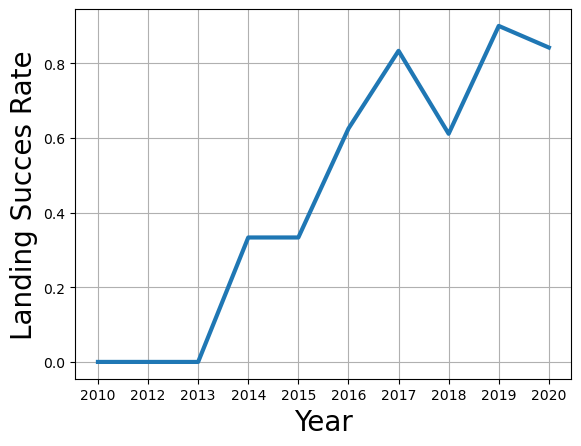

In [18]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x=series_aux.index, y=success_rates, linewidth=3) # increase linewidth for better visibility
plt.xlabel("Year",fontsize=20)
plt.ylabel("Landing Succes Rate",fontsize=20)
plt.grid() # included grid for better visibility
plt.show()

You can observe that the sucess rate since 2013 kept increasing till 2020<br>
<span style="color:red"><b>My observation:</b> <i>Humm ... Not really! There was a decrease in 2018 and 2020!</i></span>

      Class
Year       
2010      1
2012      1
2013      3
2014      6
2015      6
2016      8
2017     18
2018     18
2019     10
2020     19 
 [ 1  1  3  6  6  8 18 18 10 19] 
 <class 'numpy.ndarray'>


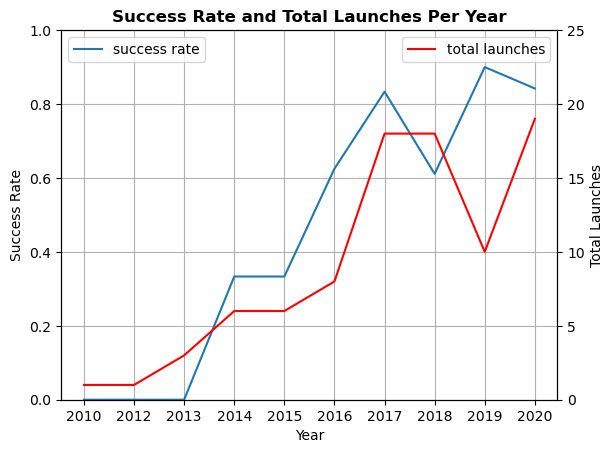

In [19]:
# MY ADDITION: creating the graph as above but adding information on number of launches per year

# gathering data to create the line with the total launches per year (tlpy)
launches_per_year = df_aux.groupby(['Year']).count()
#print(launches_per_year,'\n',type(launches_per_year),'\n',df_aux.groupby(['Year']).count().sum())
#print(launches_per_year.columns,launches_per_year.dtypes)
tlpy = np.array(launches_per_year['Class'])
print(launches_per_year,'\n',tlpy,'\n',type(tlpy))

# building the graph 
# (tip from www.geeksforgeeks.org/use-different-y-axes-on-the-left-and-right-of-a-matplotlib-plot/)
# ------------------
# Creating figure
fig = plt.figure()
 
# Plotting success rate
ax = fig.add_subplot(111)
ax.plot(series_aux.index, success_rates, '-', label='success rate')
 
# Creating Twin axes for success rate
ax2 = ax.twinx()
ax2.plot(series_aux.index, tlpy, '-r', label='total launches')
 
# Adding title
plt.title('Success Rate and Total Launches Per Year',
          fontweight="bold")
 
# Adding legend
ax.legend(loc=2)
ax2.legend(loc=0)
 
# adding grid
ax.grid()
 
# Adding labels
ax.set_xlabel("Year")
ax.set_ylabel(r"Success Rate")
ax2.set_ylabel(r"Total Launches")
 
# Setting Y limits
ax2.set_ylim(0, 25)
ax.set_ylim(0, 1)
 
# Show plot
plt.show()

<span style="color:red"><b>*** MY ANALYSIS:</b><br>The above graph gives an interesting insight. Both the success rate and the number of launches increased (monotonically) from 2010 to 2017. In 2018, the success rate reduced to the same level as in 2016, although the number of launches remained the same as in the previous year. This loss in performance led to a reduction in the number of launches in 2019 (from 18 to only 10) which suggests that SpaceX must have slowed down the launches in search for the causes of the failures. If this was indeed the case, the effect was positive as the success rate rose again in 2019, slightly decreasing in 2020 when the number of launches attained its peak in the period of this analysis.</span>

## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
print(type(features),'\n',features.head())

<class 'pandas.core.frame.DataFrame'> 
    FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004  


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [21]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, prefix=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], 
                                  columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
print(type(features_one_hot),'\n',features_one_hot.shape,features.shape)
features_one_hot.head()

<class 'pandas.core.frame.DataFrame'> 
 (90, 80) (90, 12)


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# MY ADDITION: bringing back the original columns Orbit', 'LaunchSite', 'LandingPad', 'Serial'
columns_before = list(features_one_hot.columns)
print("features_one_hot.shape before: ",features_one_hot.shape)
features_one_hot['Orbit']      = features['Orbit']     
features_one_hot['LaunchSite'] = features['LaunchSite']
features_one_hot['LandingPad'] = features['LandingPad']
features_one_hot['Serial']     = features['Serial']   
print("features_one_hot.shape after.: ",features_one_hot.shape)
columns_after = list(features_one_hot.columns)

print("Columns added: ",np.setdiff1d(columns_after,columns_before))
# yields the elements in `columns_after` that are NOT in `columns_before`)

features_one_hot.shape before:  (90, 80)
features_one_hot.shape after.:  (90, 84)
Columns added:  ['LandingPad' 'LaunchSite' 'Orbit' 'Serial']


In [23]:
# MY COMMENT: sanity check
print(features_one_hot.loc[0:0,'Orbit'], features_one_hot.loc[0:0,'Orbit_ES-L1':'Orbit_VLEO'] )

0    LEO
Name: Orbit, dtype: object    Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  \
0            0          0          0          0          0          1   

   Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  
0          0         0         0          0           0  


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [24]:
# HINT: use astype function
for c in columns_after:
    column_type = str(features_one_hot[c].dtype)
    if (column_type.find("int") != -1) | (column_type.find("bool") != -1):
        print("--> Type converted ...:",c,column_type,type(column_type))
        features_one_hot[c] = features_one_hot[c].astype(float)
    else:
        print("*** Type not converted:",c,column_type,type(column_type))

# Sanity check
print("\n=== New column types:\n")
for c in columns_after:
    column_type = str(features_one_hot[c].dtype)
    print("... Column type: ",c,column_type)

--> Type converted ...: FlightNumber int64 <class 'str'>
*** Type not converted: PayloadMass float64 <class 'str'>
--> Type converted ...: Flights int64 <class 'str'>
--> Type converted ...: GridFins bool <class 'str'>
--> Type converted ...: Reused bool <class 'str'>
--> Type converted ...: Legs bool <class 'str'>
*** Type not converted: Block float64 <class 'str'>
--> Type converted ...: ReusedCount int64 <class 'str'>
--> Type converted ...: Orbit_ES-L1 uint8 <class 'str'>
--> Type converted ...: Orbit_GEO uint8 <class 'str'>
--> Type converted ...: Orbit_GTO uint8 <class 'str'>
--> Type converted ...: Orbit_HEO uint8 <class 'str'>
--> Type converted ...: Orbit_ISS uint8 <class 'str'>
--> Type converted ...: Orbit_LEO uint8 <class 'str'>
--> Type converted ...: Orbit_MEO uint8 <class 'str'>
--> Type converted ...: Orbit_PO uint8 <class 'str'>
--> Type converted ...: Orbit_SO uint8 <class 'str'>
--> Type converted ...: Orbit_SSO uint8 <class 'str'>
--> Type converted ...: Orbit_VLEO 

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
